In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os.path
import numpy as np
import datetime
import os
import geopy
import folium
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import seaborn as sns

In [113]:
gdf = gpd.read_file("gdf_all_data.geojson") 

df = pd.read_csv("all_data.csv")

f_df = pd.read_csv("features.csv")

In [3]:
gdf_user1 = gdf[gdf['User'] == 'User1']
gdf_user2 = gdf[gdf['User'] == 'User2']
#gdf.tripNr.unique()
gdf_user1

,datetime,time,oriW,oriX,oriY,oriZ,LaccX,LaccY,LaccZ,pressure,...,mode,tripNr,User,recid,d_dist,d_time,vel,acc,vel_corr,geometry
0,2017-06-22 08:46:43.390,1.498121e+12,0.550023,0.449164,-0.564783,-0.420408,-0.595957,-1.372849,0.173059,1005.107631,...,unlabelled,220617.020,User1,220617,0.000000,NaN,NaN,NaN,NaN,POINT (50.84699 -0.13341)
1,2017-06-22 08:46:46.620,1.498121e+12,0.711295,0.667593,-0.021792,0.218854,0.164321,6.407377,-1.372446,1005.113749,...,unlabelled,220617.020,User1,220617,2.664046,3.229999,2.969217,0.285415,2.969217,POINT (50.84696 -0.13339)
2,2017-06-22 08:46:52.430,1.498121e+12,0.704656,0.686372,-0.113010,0.139928,-0.948191,-4.295378,-0.132671,1005.145165,...,Walking,220617.000,User1,220617,0.000000,NaN,NaN,NaN,NaN,POINT (50.84689 -0.13337)
3,2017-06-22 08:46:53.430,1.498121e+12,0.717173,0.672209,-0.103821,0.151705,-0.670852,-4.799349,-0.619527,1005.110957,...,Walking,220617.000,User1,220617,1.026499,1.000000,3.695396,7.181507,3.695396,POINT (50.84689 -0.13338)
4,2017-06-22 08:46:57.440,1.498121e+12,0.729197,0.662254,-0.089967,0.146949,-1.006420,-2.853471,0.186316,1005.147842,...,Walking,220617.000,User1,220617,12.115659,4.009999,10.876903,-1.129117,10.876903,POINT (50.84678 -0.13338)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8378,2017-06-27 18:25:29.770,1.498588e+12,0.098604,-0.362917,-0.696355,-0.611275,-0.018200,-0.009921,0.019379,995.976847,...,unlabelled,270617.019,User1,270617,8.270347,12.029999,2.474917,0.290482,2.474917,POINT (50.84626 -0.13430)
8379,2017-06-27 18:25:31.770,1.498588e+12,0.098598,-0.362778,-0.696167,-0.611573,0.003987,0.032127,-0.038913,995.992018,...,unlabelled,270617.019,User1,270617,3.316344,2.000000,5.969419,-2.315494,5.969419,POINT (50.84628 -0.13431)
8380,2017-06-27 18:27:41.070,1.498588e+12,0.096907,-0.362329,-0.696789,-0.611401,-0.009542,-0.001200,0.008652,995.968729,...,unlabelled,270617.019,User1,270617,48.071939,129.300000,1.338430,-0.005233,1.338430,POINT (50.84666 -0.13398)
8381,2017-06-27 18:27:44.080,1.498588e+12,0.096913,-0.362298,-0.696746,-0.611466,0.011296,-0.011515,0.010872,995.973422,...,unlabelled,270617.019,User1,270617,0.553362,3.009999,0.661828,-0.219877,0.661828,POINT (50.84667 -0.13398)


In [114]:
f_df['vel_max']=None
a = gdf.groupby(['tripNr'])[['vel']].max()
k=-1
for i in f_df["tripNr"]:
    k+=1
    for j in a.index:
        if i == j:
            f_df.iloc[k,9] = a.loc[j,"vel"]
f_df=f_df.iloc[0:152,:]
f_df
#a.to_csv("C:/Users/12448/Desktop/test.csv", index=False,header=True)

,Unnamed: 0,tripNr,mode,total_distance_m,total_duration_s,vel_corr_mean,vel_mean,acc_mean,acc_max,vel_max
0,0,140617.000,Run,655.607087,241.889990,9.618836,9.618836,-0.046969,0.882482,11.800649
1,1,140617.001,Walking,257.166103,193.629993,4.687925,4.687925,-0.046503,0.937395,7.58146
2,2,140617.002,Run,741.798973,275.979984,9.768308,9.768308,-0.036079,2.292924,12.461575
3,3,140617.003,Walking,227.277619,165.599995,4.735657,4.735657,-0.196217,0.261479,6.100149
4,4,140617.004,Run,786.320733,285.019987,9.609419,9.609419,0.000973,1.596341,12.942976
...,...,...,...,...,...,...,...,...,...,...
147,147,270617.015,Still,93.691111,403.229980,0.811631,0.811631,-0.016170,1.369844,2.503797
148,148,270617.016,Train,4998.601243,418.959975,37.225763,37.225763,-0.068759,3.087619,124.792952
149,149,270617.017,Bike,1915.268821,550.479969,13.210243,13.210243,-0.066535,2.868154,28.631847
150,150,270617.018,Still,102.141693,106.629994,2.322997,2.322997,-0.227069,0.717635,17.210074


In [5]:
def calculate_relative_positive_acceleration(acceleration, speed, time_step, distance):

    if len(distance) != len(speed) != len(acceleration) != len(time_step):
        return np.nan
    else:
        # initialize rpa
        rpa_sum = 0
        # calculate total distance
        total_distance = distance*1000
        # loop distance
        for i in range(0, len(acceleration) - 1):
            if acceleration[i] > 0:
                rpa_sum += (time_step[i] * speed[i] * acceleration[i])
        # scale to total distance
        rpa = rpa_sum / total_distance
        return rpa

In [115]:
f_df["RPA"]=calculate_relative_positive_acceleration(f_df["acc_max"], f_df["vel_mean"], f_df["total_duration_s"], f_df["total_distance_m"])
f_df

,Unnamed: 0,tripNr,mode,total_distance_m,total_duration_s,vel_corr_mean,vel_mean,acc_mean,acc_max,vel_max,RPA
0,0,140617.000,Run,655.607087,241.889990,9.618836,9.618836,-0.046969,0.882482,11.800649,12.057142
1,1,140617.001,Walking,257.166103,193.629993,4.687925,4.687925,-0.046503,0.937395,7.58146,30.737906
2,2,140617.002,Run,741.798973,275.979984,9.768308,9.768308,-0.036079,2.292924,12.461575,10.656185
3,3,140617.003,Walking,227.277619,165.599995,4.735657,4.735657,-0.196217,0.261479,6.100149,34.780140
4,4,140617.004,Run,786.320733,285.019987,9.609419,9.609419,0.000973,1.596341,12.942976,10.052828
...,...,...,...,...,...,...,...,...,...,...,...
147,147,270617.015,Still,93.691111,403.229980,0.811631,0.811631,-0.016170,1.369844,2.503797,84.370303
148,148,270617.016,Train,4998.601243,418.959975,37.225763,37.225763,-0.068759,3.087619,124.792952,1.581392
149,149,270617.017,Bike,1915.268821,550.479969,13.210243,13.210243,-0.066535,2.868154,28.631847,4.127226
150,150,270617.018,Still,102.141693,106.629994,2.322997,2.322997,-0.227069,0.717635,17.210074,77.390018


## Es gibt 5 Merkmale. Folgende ist die Vertilung jeweils.

C:\Users\12448\AppData\Local\Temp\ipykernel_6428\2690301648.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


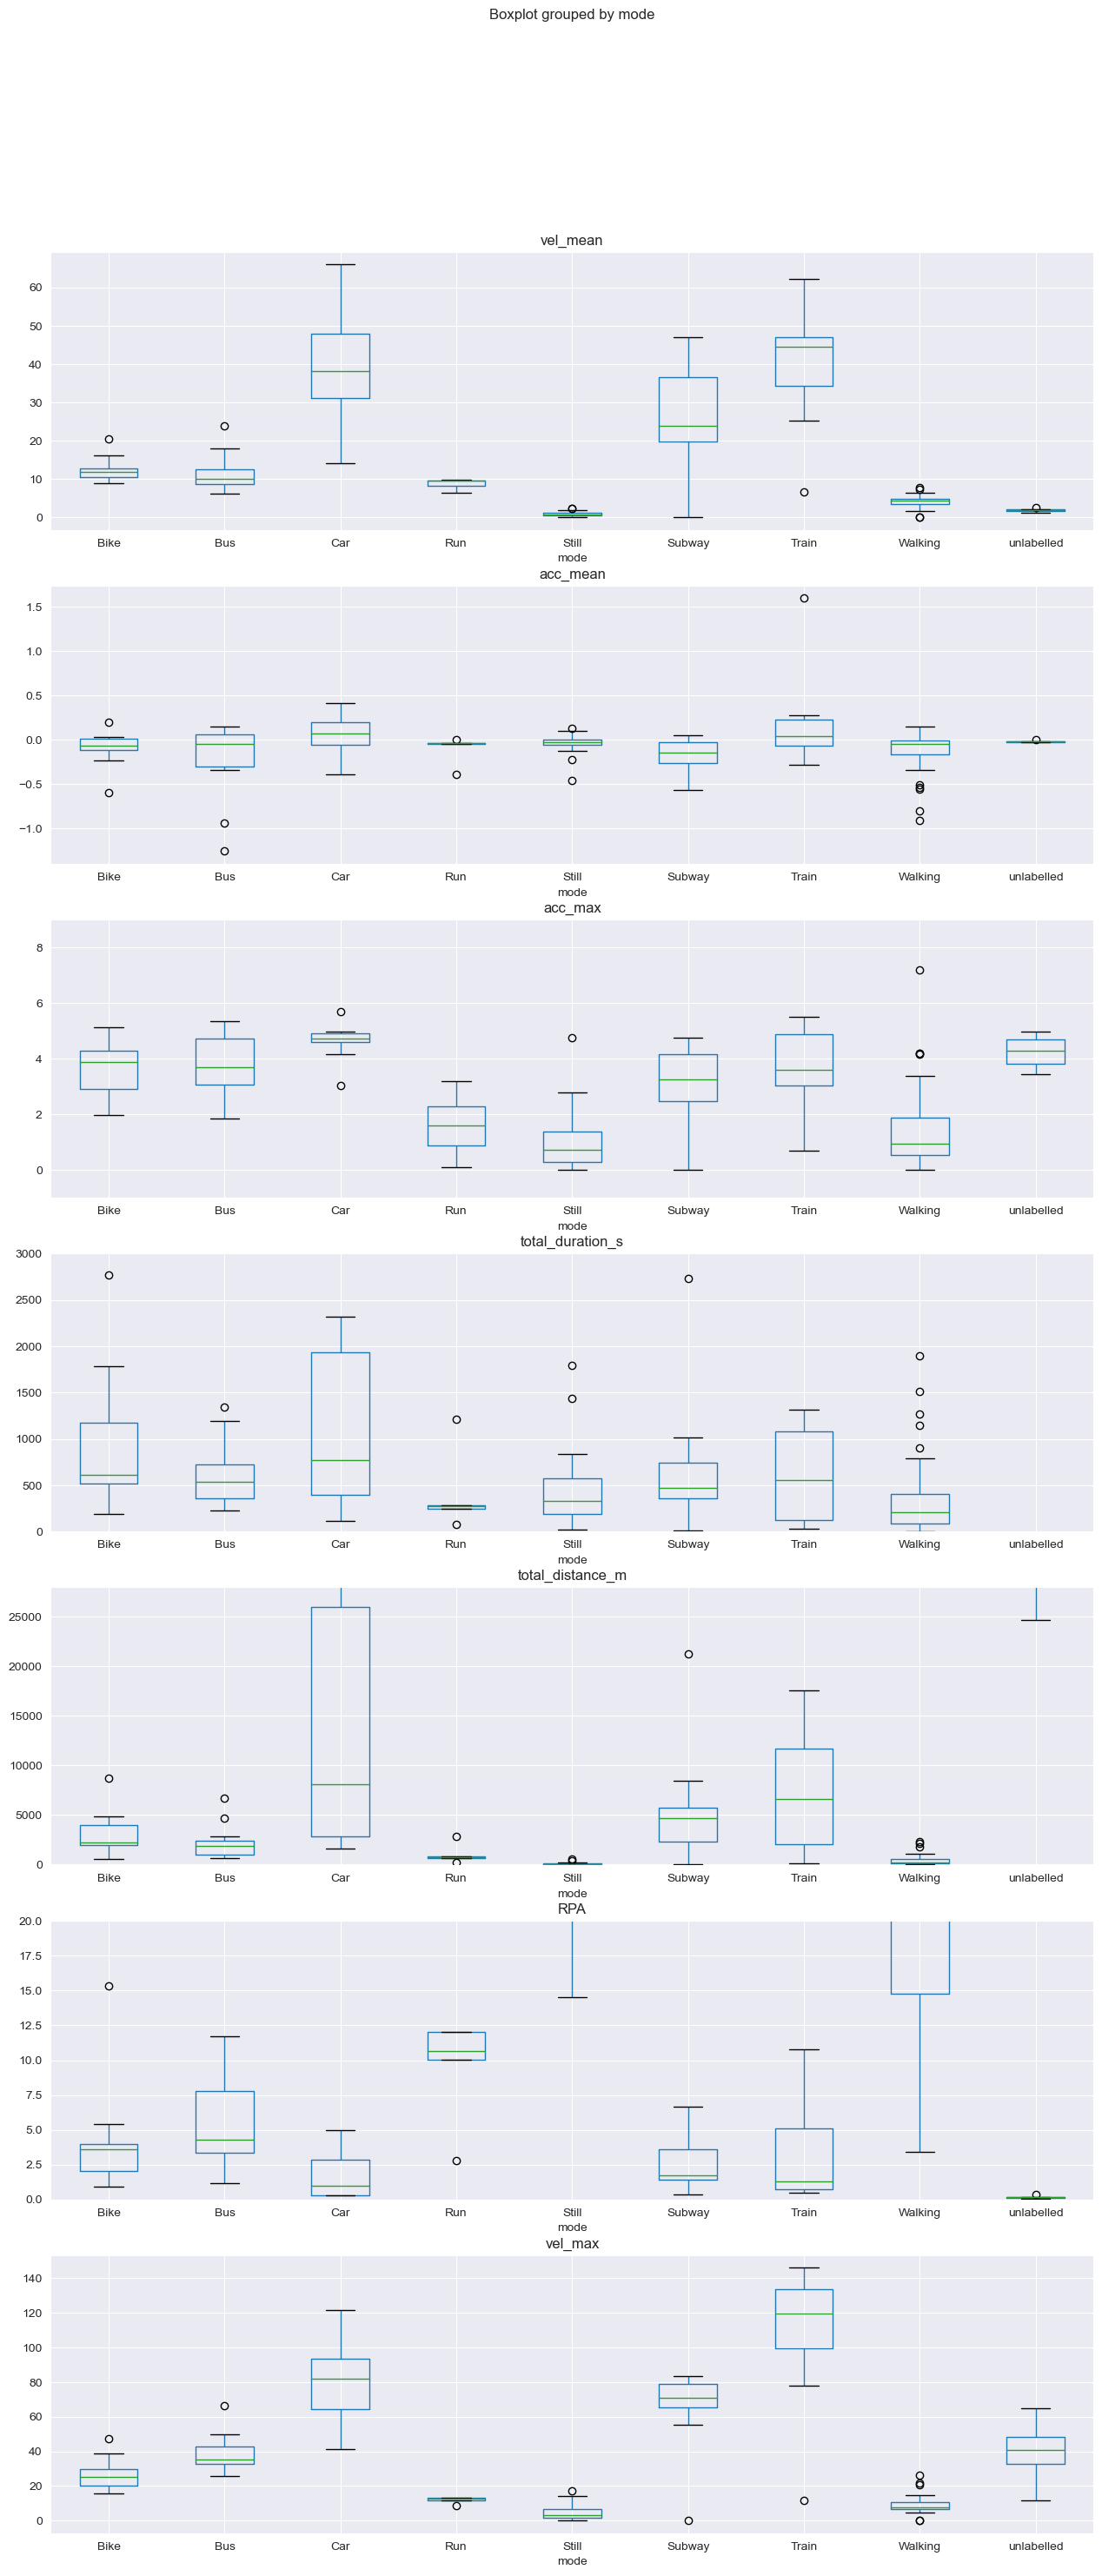

In [116]:
fig,ax = plt.subplots(7,1,figsize=(15,35))

f_df.boxplot(column='vel_mean',by='mode',ax=ax[0])

f_df.boxplot(column='acc_mean',by='mode',ax=ax[1])

f_df.boxplot(column='acc_max',by='mode',ax=ax[2])

f_df.boxplot(column='total_duration_s',by='mode',ax=ax[3])
ax[3].set_ylim(0, 3000)
f_df.boxplot(column='total_distance_m',by='mode',ax=ax[4])
ax[4].set_ylim(-100, 28000)
f_df.boxplot(column="RPA",by='mode',ax=ax[5])
f_df.boxplot(column="vel_max",by='mode',ax=ax[6])
ax[2].set_ylim(-1, 9)
ax[5].set_ylim(0, 20)
fig.show()

## ACC_mean ist nicht geeignet, anders sind gut.

In [117]:
df_labeled=f_df[f_df["mode"]!="unlabelled"]
df_unlabeled=f_df[f_df["mode"]=="unlabelled"]
df_labeled,df_unlabeled

(     Unnamed: 0      tripNr     mode  total_distance_m  total_duration_s  \
 0             0  140617.000      Run        655.607087        241.889990   
 1             1  140617.001  Walking        257.166103        193.629993   
 2             2  140617.002      Run        741.798973        275.979984   
 3             3  140617.003  Walking        227.277619        165.599995   
 4             4  140617.004      Run        786.320733        285.019987   
 ..          ...         ...      ...               ...               ...   
 146         146  270617.014    Train       2473.872693        158.289991   
 147         147  270617.015    Still         93.691111        403.229980   
 148         148  270617.016    Train       4998.601243        418.959975   
 149         149  270617.017     Bike       1915.268821        550.479969   
 150         150  270617.018    Still        102.141693        106.629994   
 
      vel_corr_mean   vel_mean  acc_mean    acc_max     vel_max        RPA

In [119]:
suitable_features = ['vel_mean', 'acc_max', 'total_duration_s', 'total_distance_m',"vel_max", "RPA"]
X = df_labeled[suitable_features]
X = X.values
y = df_labeled['mode']
y = y.values

unique_group = np.unique(y)
unique_group


array(['Bike', 'Bus', 'Car', 'Run', 'Still', 'Subway', 'Train', 'Walking'],
      dtype=object)